In [1]:
import sys
sys.path.insert(0, "../")
import rebound
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from src.utilities.constants import sec2year, rad2Deg, m2au, au2m
from src.utilities.misc import normDif

In [2]:
def invariable_inc(sim, p):
    from numpy import cross, dot, arccos
    from numpy.linalg import norm
    sim_ang_mom = sim.calculate_angular_momentum()
    p_ang_mom = cross(p.xyz, p.vxyz)

    inc = arccos(dot(sim_ang_mom, p_ang_mom)/(norm(sim_ang_mom)*norm(p_ang_mom)))
    return inc*rad2Deg

In [3]:
sa_ss = rebound.SimulationArchive("/Users/bethclark/Projects/rebound/examples/Flora_1Myr/Flora_1Myr_C.bin")
len(sa_ss)

20001

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

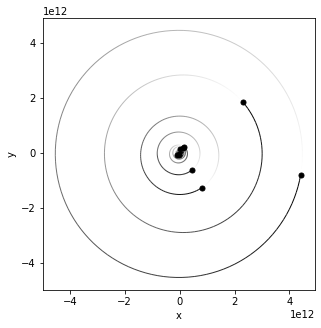

In [4]:
rebound.OrbitPlot(sa_ss[0])

In [5]:
sa_ss[0].status()

---------------------------------
REBOUND version:     	3.16.0
REBOUND built on:    	Mar 27 2021 13:02:23
Number of particles: 	10
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	500000.000000
---------------------------------
<rebound.particle.Particle object at 0x7fb3105880c0, m=1.988475415966536e+30 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7fb3105881c0, m=3.3011412045397036e+23 x=-12377636957.996445 y=-68549003077.403564 z=-4466132585.951368 vx=38164.295927442945 vy=-6189.637299863502 vz=-4006.650565821503>
<rebound.particle.Particle object at 0x7fb3105880c0, m=4.86746636068329e+24 x=-95379973351.26862 y=-50491805902.89237 z=4811083913.171173 vx=16141.66420466722 vy=-31115.307750086453 vz=-1358.4736543746394>
<rebound.particle.Particle object at 0x7fb3105881c0, m=6.04583029776e+24 x=12275420975.238695 y=146699675487.81586 z=-6919775.972812841 vx=-30170.45657859281 vy=2371.6417025391615 vz=-0.029

In [6]:
eccentricities = np.zeros(len(sa_ss))
inclinations = np.zeros(len(sa_ss))
semi_major_axis = np.zeros(len(sa_ss))
ts = np.zeros(len(sa_ss))
for i, sim in enumerate(sa_ss):
    sim.move_to_com()
    ps = sim.particles
    flora_orbit = ps["Flora"].calculate_orbit(ps[0])
    eccentricities[i] = flora_orbit.e
    inclinations[i] = invariable_inc(sim, ps["Flora"])
    semi_major_axis[i] = flora_orbit.a*m2au
    ts[i] = sim.t/sec2year/1e3

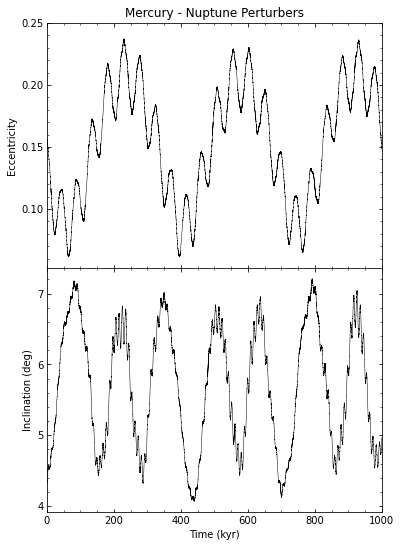

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (6,9))
ax1.plot(ts, eccentricities, lw = .5, c = 'k')
ax1.set_ylabel("Eccentricity")
ax1.set_yticks([0.1, 0.15, 0.2, 0.25])
ax1.minorticks_on()
ax1.tick_params(which='both', direction = 'in', top=True, right=True)

ax2.minorticks_on()
ax2.tick_params(which='both', direction = 'in', top=True, right=True)
ax2.plot(ts, inclinations, lw = .5, c = 'k')
ax2.set_yticks([4, 5, 6, 7])
ax2.set_ylabel('Inclination (deg)')
ax2.set_xlabel('Time (kyr)')
plt.subplots_adjust(hspace=0)
ax1.set_title("Mercury - Nuptune Perturbers")
plt.xlim(0, 1e3)
#plt.savefig('../figures/Flora_1Myr_SS.pdf')

In [8]:
sa_sb = rebound.SimulationArchive("/Users/bethclark/Projects/rebound/examples/Flora_1Myr/Flora_1Myr_C_MERC_SMALLBODIES.bin")
len(sa_sb)

20001

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


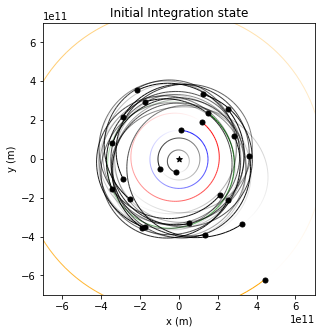

In [21]:
plotparticles = [1, 2, 3, 4, 5, "Flora"] + list(range(11, 29))
color = ['black', 'black', 'blue', 'red', 'orange', 'green'] + ['black' for _ in range(11,29)]
rebound.OrbitPlot(sa_sb[0], xlim=[-.7e12,.7e12], ylim=[-.7e12,.7e12], plotparticles=plotparticles, color=color, unitlabel='(m)')
plt.title("Initial Integration state")
#plt.savefig('../figures/Flora_1Myr_SB_Orbits.pdf')

In [10]:
eccentricities_small = np.zeros(len(sa_ss))
inclinations_small = np.zeros(len(sa_ss))
semi_major_axis_small = np.zeros(len(sa_ss))
e_diffs = np.zeros(len(sa_ss))
i_diffs = np.zeros(len(sa_ss))
a_diffs = np.zeros(len(sa_ss))
for i, sim in enumerate(sa_sb):
    sim.integrate(sa_ss[i].t, exact_finish_time=True)
    sim.move_to_com()
    ps = sim.particles
    flora_orbit = ps["Flora"].calculate_orbit(ps[0])
    eccentricities_small[i] = flora_orbit.e
    inclinations_small[i] = invariable_inc(sim, ps["Flora"])
    semi_major_axis_small[i] = flora_orbit.a*m2au
    e_diffs[i] = eccentricities[i] - flora_orbit.e
    i_diffs[i] = inclinations[i] - invariable_inc(sim, ps["Flora"])
    a_diffs[i] = semi_major_axis[i] - flora_orbit.a*m2au

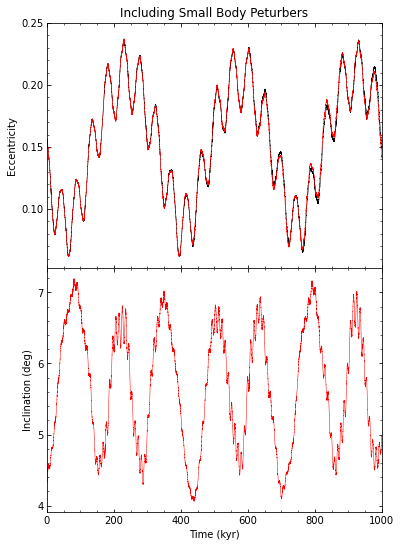

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (6,9))
ax1.plot(ts, eccentricities, lw = .5, c = 'k')
ax1.plot(ts, eccentricities_small, lw = .5, c = 'r')
ax1.set_ylabel("Eccentricity")
ax1.set_yticks([0.1, 0.15, 0.2, 0.25])
ax1.minorticks_on()
ax1.tick_params(which='both', direction = 'in', top=True, right=True)

ax2.minorticks_on()
ax2.tick_params(which='both', direction = 'in', top=True, right=True)
ax2.plot(ts, inclinations_small, lw = .5, c = 'r')
ax2.set_yticks([4, 5, 6, 7])
ax2.set_ylabel('Inclination (deg)')
ax2.set_xlabel('Time (kyr)')
plt.subplots_adjust(hspace=0)
ax1.set_title("Including Small Body Peturbers")
plt.xlim(0, 1e3)
#plt.savefig('../figures/Flora_1Myr_SB.pdf')

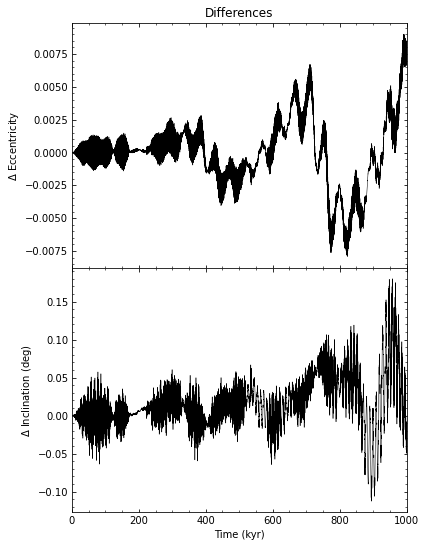

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (6,9))
ax1.plot(ts, e_diffs, lw = .5, c = 'k')
ax1.set_ylabel("$\Delta$ Eccentricity")
#ax1.set_yticks([0.1, 0.15, 0.2, 0.25])
ax1.minorticks_on()
ax1.tick_params(which='both', direction = 'in', top=True, right=True)

ax2.minorticks_on()
ax2.tick_params(which='both', direction = 'in', top=True, right=True)
ax2.plot(ts, i_diffs, lw = .5, c = 'k')
#ax2.set_yticks([4, 5, 6, 7])
ax2.set_ylabel('$\Delta$ Inclination (deg)')
ax2.set_xlabel('Time (kyr)')
plt.subplots_adjust(hspace=0)
ax1.set_title("Differences")
plt.xlim(0, 1e3)
#plt.savefig('../figures/Flora_1Myr_Residuals.pdf')

In [51]:
sa_ss_nm = rebound.SimulationArchive("/Users/bethclark/Projects/rebound/examples/Flora_1Myr/Flora_1Myr_C_MERC_nomercury.bin")
len(sa_ss_nm)

20001

In [61]:
eccentricities_nm = np.zeros(len(sa_ss))
inclinations_nm = np.zeros(len(sa_ss))
semi_major_axis_nm = np.zeros(len(sa_ss))
e_diffs_nm = np.zeros(len(sa_ss))
i_diffs_nm = np.zeros(len(sa_ss))
a_diffs_nm = np.zeros(len(sa_ss))
for i, sim in enumerate(sa_ss_nm):
    sim.integrate(sa_ss[i].t, exact_finish_time=True)
    sim.move_to_com()
    ps = sim.particles
    flora_orbit = ps["Flora"].calculate_orbit(ps[0])
    eccentricities_nm[i] = flora_orbit.e
    inclinations_nm[i] = invariable_inc(sim, ps["Flora"])
    semi_major_axis_small[i] = flora_orbit.a*m2au
    e_diffs_nm[i] = eccentricities[i] - flora_orbit.e
    i_diffs_nm[i] = inclinations[i] - invariable_inc(sim, ps["Flora"])
    a_diffs_nm[i] = semi_major_axis[i] - flora_orbit.a*m2au

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


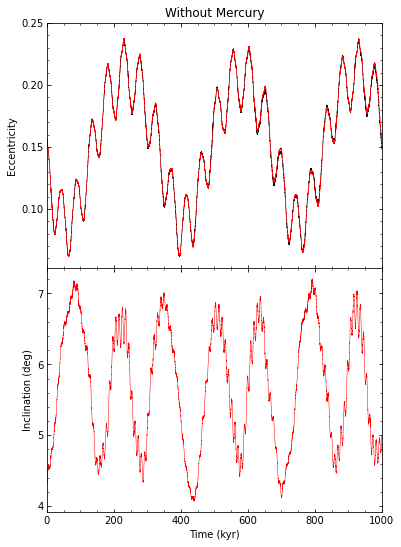

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (6,9))
ax1.plot(ts, eccentricities, lw = .5, c = 'k')
ax1.plot(ts, eccentricities_nm, lw = .5, c = 'r')
ax1.set_ylabel("Eccentricity")
ax1.set_yticks([0.1, 0.15, 0.2, 0.25])
ax1.minorticks_on()
ax1.tick_params(which='both', direction = 'in', top=True, right=True)

ax2.minorticks_on()
ax2.tick_params(which='both', direction = 'in', top=True, right=True)
ax2.plot(ts, inclinations_nm, lw = .5, c = 'r')
ax2.set_yticks([4, 5, 6, 7])
ax2.set_ylabel('Inclination (deg)')
ax2.set_xlabel('Time (kyr)')
plt.subplots_adjust(hspace=0)
ax1.set_title("Without Mercury")
plt.xlim(0, 1e3)
plt.savefig('../figures/Flora_1Myr_noMercury.pdf')

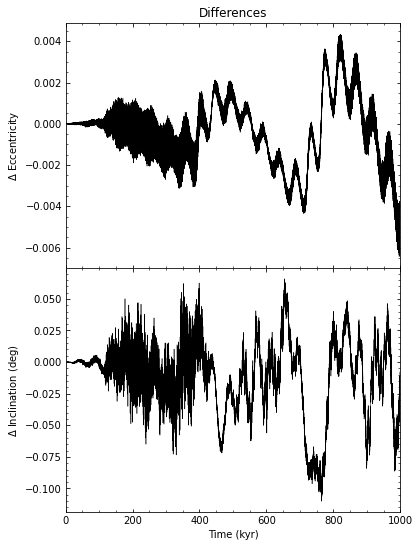

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (6,9))
ax1.plot(ts, e_diffs_nm, lw = .5, c = 'k')
ax1.set_ylabel("$\Delta$ Eccentricity")
#ax1.set_yticks([0.1, 0.15, 0.2, 0.25])
ax1.minorticks_on()
ax1.tick_params(which='both', direction = 'in', top=True, right=True)

ax2.minorticks_on()
ax2.tick_params(which='both', direction = 'in', top=True, right=True)
ax2.plot(ts, i_diffs_nm, lw = .5, c = 'k')
#ax2.set_yticks([4, 5, 6, 7])
ax2.set_ylabel('$\Delta$ Inclination (deg)')
ax2.set_xlabel('Time (kyr)')
plt.subplots_adjust(hspace=0)
ax1.set_title("Differences")
plt.xlim(0, 1e3)
plt.savefig('../figures/Flora_1Myr_Residuals_noMercury.pdf')

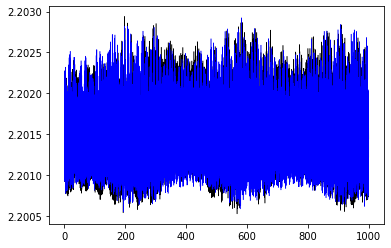

In [13]:
plt.plot(ts, semi_major_axis_small, lw = .5, c = 'k')
plt.plot(ts, semi_major_axis, lw = .5, c = 'b')

In [80]:
ss_yarko = rebound.SimulationArchive("/Users/bethclark/Projects/rebound/examples/basic_yarko/Yarko_1Myr_C_WHF.bin")
len(ss_yarko)

201

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


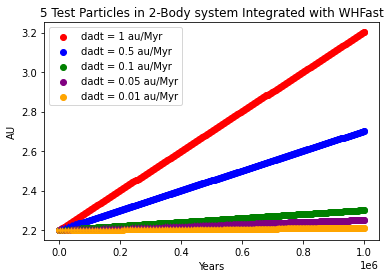

In [84]:
for i, sim in enumerate(ss_yarko):
    ps = sim.particles
    plt.scatter(sim.t/sec2year, ps[1].a*m2au, c = 'r')
    plt.scatter(sim.t/sec2year, ps[2].a*m2au, c = 'b')
    plt.scatter(sim.t/sec2year, ps[3].a*m2au, c = 'g')
    plt.scatter(sim.t/sec2year, ps[4].a*m2au, c = 'purple')
    plt.scatter(sim.t/sec2year, ps[5].a*m2au, c = 'orange')
    if i == (len(ss_yarko)-1):
        plt.scatter(sim.t/sec2year, ps[1].a*m2au, c = 'r', label = 'dadt = 1 au/Myr')
        plt.scatter(sim.t/sec2year, ps[2].a*m2au, c = 'b', label = 'dadt = 0.5 au/Myr')
        plt.scatter(sim.t/sec2year, ps[3].a*m2au, c = 'g', label = 'dadt = 0.1 au/Myr')
        plt.scatter(sim.t/sec2year, ps[4].a*m2au, c = 'purple', label = 'dadt = 0.05 au/Myr')
        plt.scatter(sim.t/sec2year, ps[5].a*m2au, c = 'orange', label = 'dadt = 0.01 au/Myr')
        plt.legend()
    plt.title("5 Test Particles in 2-Body system Integrated with WHFast")
    plt.xlabel('Years')
    plt.ylabel('AU')
    plt.savefig('Yarko_WHF.png')

In [83]:
print(ss_yarko[-1].particles[1].a*m2au - ss_yarko[0].particles[1].a*m2au)
print(ss_yarko[-1].particles[2].a*m2au - ss_yarko[0].particles[2].a*m2au)
print(ss_yarko[-1].particles[3].a*m2au - ss_yarko[0].particles[3].a*m2au)
print(ss_yarko[-1].particles[4].a*m2au - ss_yarko[0].particles[4].a*m2au)
print(ss_yarko[-1].particles[5].a*m2au - ss_yarko[0].particles[5].a*m2au)

1.0000000149466883
0.5000000040925574
0.10000000017620447
0.05000000004455396
0.010000000003000498
/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


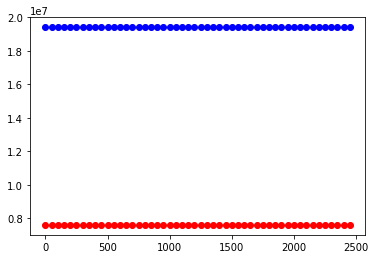

In [44]:
for i in range(50):
    sim = sa_sb[i]
    ps = sim.particles
    plt.scatter(sim.t/sec2year, ps[1].P, c='r')
    plt.scatter(sim.t/sec2year, ps[2].P, c='b')

In [50]:
ps[2].P*.05

970702.1965989743